In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

##**dataset 1**

In [170]:
dataset1 = pd.read_csv("/content/software_requirements_extended (1).csv")
dataset2 = pd.read_csv('/content/Dataset.csv')
dataset3=pd.read_csv('/content/nfr (1).csv')
dataset4=pd.read_csv('/content/PROMISE_exp.csv')

dataset2 = dataset2.drop(columns=['Scenario', 'Author'])
dataset3 = dataset3.drop(columns=['ProjectID'])
dataset4 = dataset4.drop(columns=['ProjectID'])

dataset2.rename(columns={'Requirement Type': 'Type'}, inplace=True)
dataset3.rename(columns={'RequirementText': 'Requirement'}, inplace=True)
dataset4.rename(columns={'RequirementText': 'Requirement'}, inplace=True)

dataset3.rename(columns={'class': 'Type'}, inplace=True)
dataset4.rename(columns={'_class_': 'Type'}, inplace=True)

dataset2['Type'] = dataset2['Type'].replace({'Functional': 'FR', 'Nonfunctional': 'NFR'})
categories_to_replace = ['PE' , 'LF' , 'US' , 'A' , 'SE' , 'FT' , 'SC' , 'PO' , 'O' , 'L' , 'MN']
dataset3['Type'] = dataset3['Type'].replace(categories_to_replace, 'NFR')
dataset4['Type'] = dataset4['Type'].replace(categories_to_replace, 'NFR')
dataset1 = pd.concat([dataset1, dataset2, dataset3, dataset4], ignore_index=True)


dataset1['Type'] = dataset1['Type'].replace({'F': 'FR'})
categories_to_replace = ['A', 'FT', 'L', 'LF', 'MN', 'O', 'PE', 'PO', 'SC', 'SE', 'US']
dataset1['Type'] = dataset1['Type'].replace(categories_to_replace, 'NFR')




In [171]:
print(dataset1.dtypes)

Type           object
Requirement    object
dtype: object


In [172]:
print(dataset1.shape)

(2971, 2)


In [173]:
print("Distribution of each requirement type:")
print(dataset1['Type'].value_counts())

Distribution of each requirement type:
Type
NFR    1551
FR     1420
Name: count, dtype: int64


In [174]:
print("\nUnique requirement types in 'Type' column:")
print(dataset1['Type'].unique())


Unique requirement types in 'Type' column:
['NFR' 'FR']


<ipython-input-175-cbee0d604879>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset1, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')


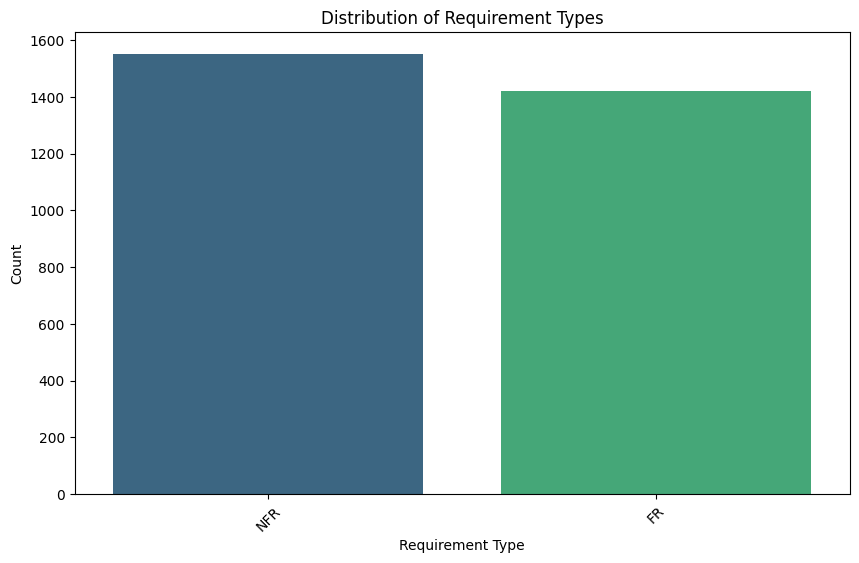

In [175]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset1, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')
plt.title("Distribution of Requirement Types")
plt.xlabel("Requirement Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [176]:
dataset_copy = dataset1.copy()
dataset_copy['Type'] = dataset_copy['Type'].replace({'F': 'FR'})
categories_to_replace = ['A', 'FT', 'L', 'LF', 'MN', 'O', 'PE', 'PO', 'SC', 'SE', 'US']
dataset_copy['Type'] = dataset_copy['Type'].replace(categories_to_replace, 'NFR')



<ipython-input-177-f24551e50be6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category, palette='Set2')


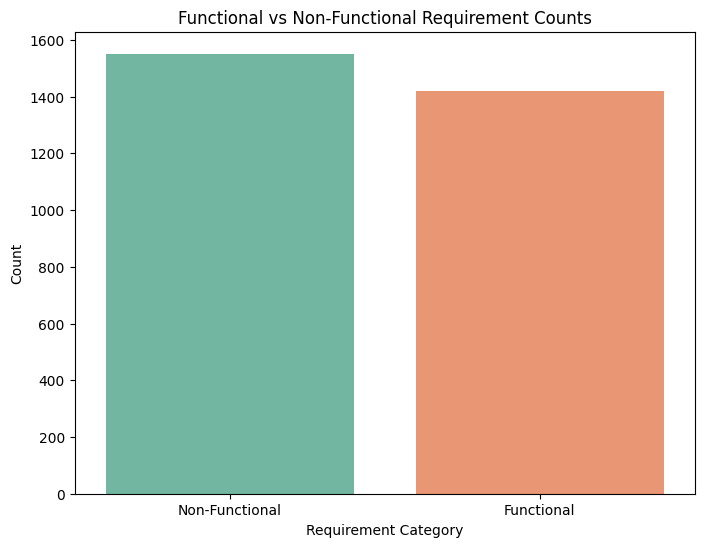

In [177]:
# Create a copy of the dataset to work with
functional_labels = ['F', 'FR']
# Apply the transformation to the copied dataset without altering the original
category = dataset_copy['Type'].apply(lambda x: 'Functional' if x in functional_labels else 'Non-Functional')

# Plot the counts
plt.figure(figsize=(8, 6))
sns.countplot(x=category, palette='Set2')
plt.title("Functional vs Non-Functional Requirement Counts")
plt.xlabel("Requirement Category")
plt.ylabel("Count")
plt.show()


Summary statistics for requirement lengths:


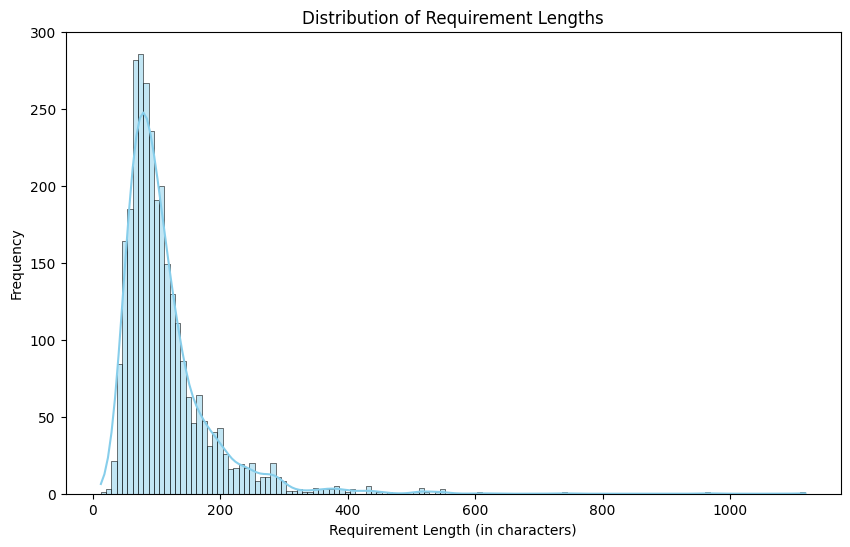

In [178]:
dataset_copy['Requirement_Length'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for requirement lengths:")
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Requirement_Length'], kde=True, color='skyblue')
plt.title("Distribution of Requirement Lengths")
plt.xlabel("Requirement Length (in characters)")
plt.ylabel("Frequency")
plt.show()

In [179]:
dataset_copy['Word_Count'] = dataset_copy['Requirement'].apply(lambda x: len(x.split()))   # Word count
dataset_copy['Character_Count'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for word counts:")
print(dataset_copy['Word_Count'].describe())
print("\nSummary statistics for character counts:")
print(dataset_copy['Character_Count'].describe())

Summary statistics for word counts:
count    2971.000000
mean       18.549983
std        11.783418
min         2.000000
25%        11.000000
50%        16.000000
75%        22.000000
max       179.000000
Name: Word_Count, dtype: float64

Summary statistics for character counts:
count    2971.000000
mean      113.687647
std        71.564748
min        13.000000
25%        72.000000
50%        95.000000
75%       132.000000
max      1118.000000
Name: Character_Count, dtype: float64


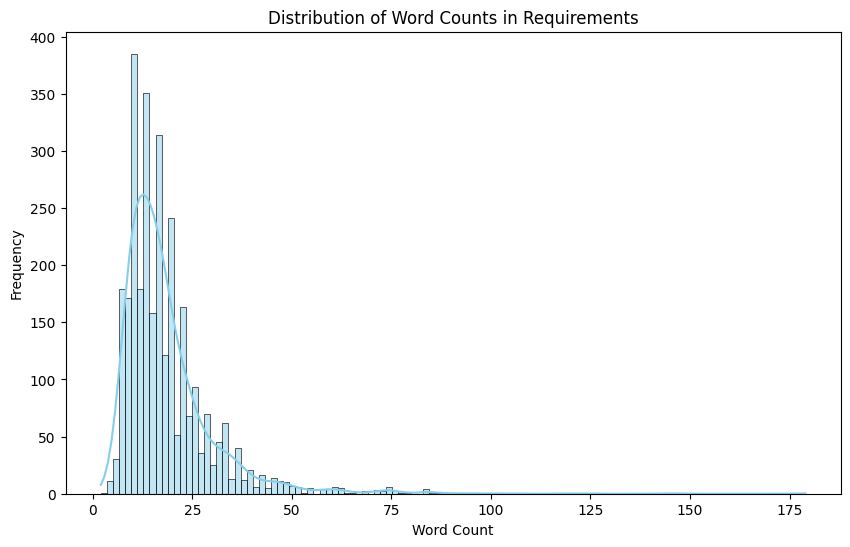

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Word_Count'], kde=True, color='skyblue')
plt.title("Distribution of Word Counts in Requirements")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [181]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [182]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

nltk.download('punkt')


# 1. Average Length of All Requirements
def average_length(dataset_copy):
    avg_length = dataset_copy['Requirement'].apply(len).mean()
    return avg_length

# 2. Textual Complexity Analysis
def textual_complexity(dataset_copy):
    word_lengths = dataset_copy['Requirement'].apply(lambda x: [len(word) for word in word_tokenize(x)])
    avg_word_length = word_lengths.apply(lambda x: sum(x) / len(x)).mean()
    sentence_counts = dataset_copy['Requirement'].apply(lambda x: len(sent_tokenize(x)))
    avg_sentence_length = dataset_copy['Requirement'].apply(lambda x: len(word_tokenize(x)) / len(sent_tokenize(x)))

    complexity_data = {
        'avg_word_length': avg_word_length,
        'avg_sentence_count': sentence_counts.mean(),
        'avg_sentence_length': avg_sentence_length.mean()
    }

    return complexity_data

# 3. Unique vs. Repeated Requirements
def unique_vs_repeated(dataset_copy):
    requirement_counts = dataset_copy['Requirement'].value_counts()
    repeated_requirements = requirement_counts[requirement_counts > 1]
    unique_requirements_count = len(requirement_counts[requirement_counts == 1])

    return {
        'total_requirements': len(dataset_copy),
        'unique_requirements': unique_requirements_count,
        'repeated_requirements': len(repeated_requirements),
        'repeated_requirements_list': repeated_requirements
    }

# Run the analyses
avg_length = average_length(dataset_copy)
complexity = textual_complexity(dataset_copy)
uniqueness = unique_vs_repeated(dataset_copy)

# Output results
print("Average Length of All Requirements:")
print(avg_length)

print("\nTextual Complexity:")
print(complexity)

print("\nUnique vs. Repeated Requirements:")
print(uniqueness)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Length of All Requirements:
113.6876472568159

Textual Complexity:
{'avg_word_length': 4.901137503688399, 'avg_sentence_count': 1.2154156849545608, 'avg_sentence_length': 16.375252039556987}

Unique vs. Repeated Requirements:
{'total_requirements': 2971, 'unique_requirements': 1363, 'repeated_requirements': 583, 'repeated_requirements_list': Requirement
User data should be regularly backup and stored safely                                                                                             8
The software should be updated regularly and compatible with technological progress                                                                8
Software should appeal to a wide audience by providing multiple language support.                                                                  7
The system should be scaled and can be easily adapted to increasing user demands.                                                                  7
A strong authentication system should be

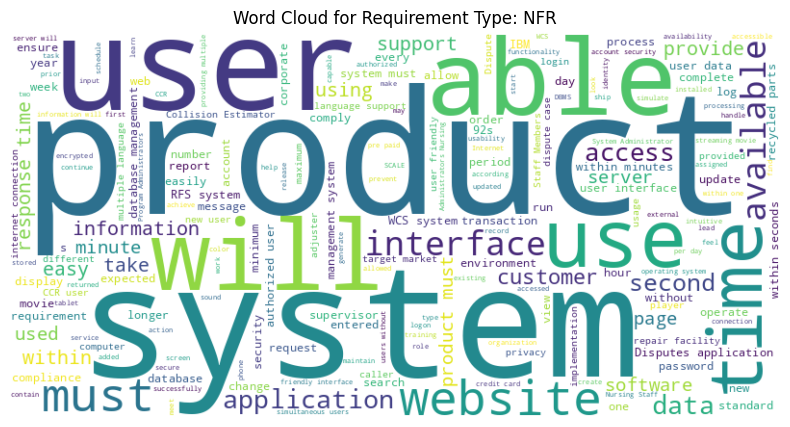

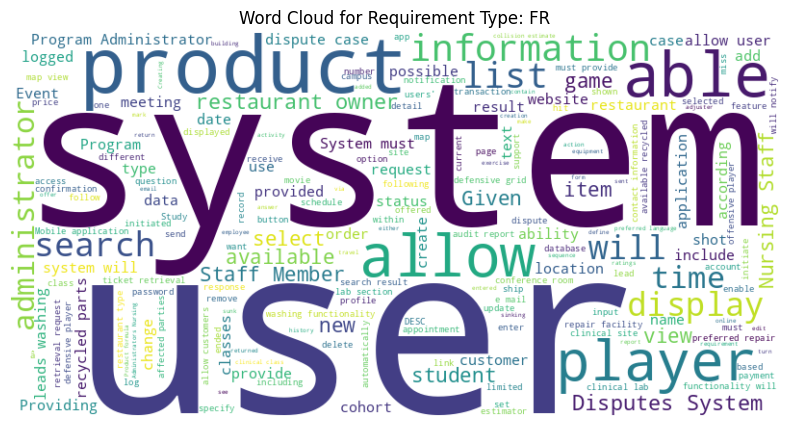

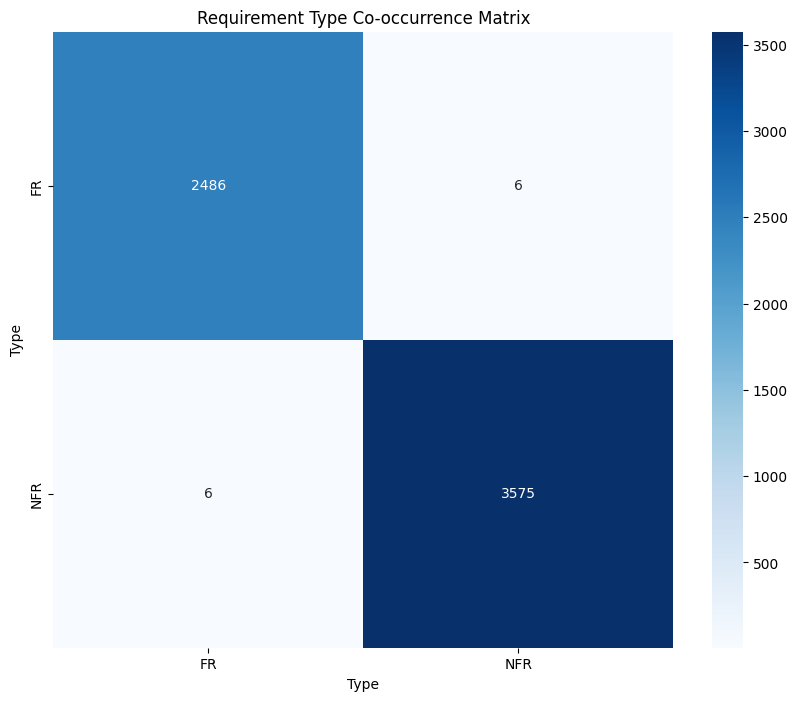

In [183]:
from wordcloud import WordCloud
def generate_word_clouds_by_type(dataset_copy):
    requirement_types = dataset_copy['Type'].unique()

    for req_type in requirement_types:
        text = " ".join(requirement for requirement in dataset_copy[dataset_copy['Type'] == req_type]['Requirement'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Requirement Type: {req_type}")
        plt.show()



# 3. Requirement Type Co-occurrence Matrix
def requirement_type_cooccurrence_matrix(dataset_copy):
    # This assumes a requirement can belong to multiple types, stored as lists in the 'requirement_type' column
    dataset_copy = dataset_copy.explode('Type')  # Splits multi-type entries
    co_occurrence = pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type']).T.dot(
        pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type'])
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
    plt.title("Requirement Type Co-occurrence Matrix")
    plt.show()

# Run visualizations
generate_word_clouds_by_type(dataset_copy)
requirement_type_cooccurrence_matrix(dataset_copy)

In [184]:
# 1. Check for Missing / Incomplete Data
def check_missing_data(dataset_copy):
    missing_data = dataset_copy.isnull().sum()
    incomplete_rows = dataset_copy[dataset_copy.isnull().any(axis=1)]

    print("Missing Data Summary:")
    print(missing_data)
    print("\nRows with Incomplete Data:")
    print(incomplete_rows)

    return missing_data, incomplete_rows

missing_data, incomplete_rows = check_missing_data(dataset1)


Missing Data Summary:
Type           0
Requirement    0
dtype: int64

Rows with Incomplete Data:
Empty DataFrame
Columns: [Type, Requirement]
Index: []


In [185]:
def check_duplicates(dataset_copy):
    duplicate_rows = dataset_copy[dataset_copy.duplicated()]
    print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
    print("Duplicate Rows:")
    print(duplicate_rows)

    return duplicate_rows
duplicate_rows = check_duplicates(dataset1)



Number of Duplicate Rows: 1024
Duplicate Rows:
     Type                                        Requirement
1092  NFR  Working with energy efficiency and low battery...
1093  NFR  Localization and multiple language support for...
1096  NFR  Creating an effective communication and suppor...
1114  NFR  Working with energy efficiency and low battery...
1128  NFR           High performance and fast response times
...   ...                                                ...
2620  NFR  User access should be limited to the permissio...
2621  NFR  The product must comply with the intranet page...
2622  NFR  The intranet pages should display appropriatel...
2623  NFR  The users should be able to easily use the sys...
2624  NFR  The product interface should be fast. The resp...

[1024 rows x 2 columns]


##**test dataset**

In [186]:
testDataSet = pd.read_csv("/content/nfr-test.csv")
testDataSet




,Column1,Column2
0,F,The system shall display Events or Activities.
1,F,The display shall have two regions left 2/3 o...
2,F,The data displayed in both the nodes within th...
3,F,The table side of the display shall be split i...
4,F,The top 1/4 of the table will hold events that...
...,...,...
65,SE,The Disputes application shall manipulate and ...
66,SE,All updates to data files or database must be ...
67,L,The Disputes application must conform to the l...
68,L,All business rules specified in the Disputes S...


In [187]:
testDataSet.rename(columns={"Column1": "Type", "Column2": "Requirement"}, inplace=True)
testDataSet['Type'] = testDataSet['Type'].replace({'F': 'FR'})
categories_to_replace = ['A', 'FT', 'L', 'LF', 'MN', 'O', 'PE', 'PO', 'SC', 'SE', 'US']
testDataSet['Type'] = testDataSet['Type'].replace(categories_to_replace, 'NFR')

##**Functions**

In [188]:
## lower casing

def lower_casing(df):
  df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
  return df

newDS1=lower_casing(dataset_copy)
newTestDS=lower_casing(testDataSet.copy())


In [189]:
def extract_named_entities(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    entities = []
    for chunk in named_entities:
        if hasattr(chunk, 'label'):
            entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return entities

In [190]:
## removing non word and non whitespaces
def remover(df):
  df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
  return df

newDS1=remover(newDS1)
newTestDS=remover(newTestDS)

In [191]:
## removing digits
def digit_remover(df):
  df = df.replace(to_replace=r'\d', value='', regex=True)
  return df

newDS1=digit_remover(newDS1)
newTestDS=digit_remover(newTestDS)


In [192]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [193]:
## remove puncituation
def remove_punc(df,label):
  xx= []
  for i in range(len(df[label])):
    temp =df[label][i]
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in temp.split()]
    stripped = ' '.join(stripped)
    xx.append(stripped)
  return xx

newDS1['Requirement']=remove_punc(newDS1,'Requirement')
newTestDS['Requirement']=remove_punc(newTestDS,'Requirement')



In [194]:
## before stepping into integration and tokenization phase we just make sure all our datasets have the same features
print(newDS1['Type'].unique())
print(newTestDS['Type'].unique())

['nfr' 'fr']
['fr' 'nfr']


In [195]:
## check if all sentences are written in english characters
def count_non_english_characters(df,label):
  count =[]
  for i in range(len(df[label])):
    non_english_chars = re.findall(r'[^a-zA-Z\s]', df[label][i])
    if non_english_chars:  print(non_english_chars , df[label][i])
    count.append(len(non_english_chars))
    # count = len(non_english_chars)
  return sum(count)  # Output: 8


In [196]:
## dataset 1
x=count_non_english_characters(newDS1,'Requirement')
print('Number of non english  characters : ' , x)

['â', 'â'] the twitter âtweetâ interface should be according to the twitter guidelines
['â', 'â'] the facebook âlikeâ interface should be according to the facebook guidelines
['â'] hard drive space gist hard drive space scale the applicationâs need of hard drive space meter mb must no more than mb plan no more than mb wish no more than mb mb defined megabyte
['â', 'œ', 'â', 'â'] design constraints we will use âœwaterfall methodâ and object â oriented programming paradigm we will use java as programming language the android version of the device should be or higher the system requires internet connection all the time
['â'] â the system will be designed in such a way that the algorithms for the four main units will be able to be easily swapped out
['â'] the overall accuracy of the web apiâs response will be measured using a developermade testing set
['â'] the accuracy of the generic question constructionâ part will be close to
['â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â'] 

In [197]:
##test dataset
z=count_non_english_characters(newTestDS,'Requirement')
print('Number of non english  characters : ' , z)

Number of non english  characters :  0


In [198]:
## removing the non english
def remove_non_english_characters(df,label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    non_english_chars = re.sub(r'[^a-zA-Z\s]', '', temp)
    x.append(non_english_chars)
  return x

newDS1['Requirement']=remove_non_english_characters(newDS1,'Requirement')
newTestDS['Requirement']=remove_non_english_characters(newTestDS,'Requirement')

## testing our work
print('Number of non english characters dataset 1 : ',count_non_english_characters(newDS1,'Requirement') ,'\nNumber of non english  characters : ',
count_non_english_characters(newTestDS,'Requirement'))

Number of non english characters dataset 1 :  0 
Number of non english  characters :  0



## stemming :  Convert words to their base forms to reduce redundancy.
## lemmatization :  Convert words to their base forms to reduce redundancy.
##named entity recognition :  Identify entities such as people, systems, dates, etc., which could be crucial in defining use cases.



## **Note** : that the differnece between stemming and lemmatization is that

1 ) meaning
stemming : meaning isn't important to me or the proccess
lemmatization : meaning is very important ans=d can actually determine the output

2) based
stemming : rule approch based where it focuses on finding the words with the same root no matter thier meaning
lemmatization : dictionary based approch where it traces the word back to it's root and determine it's meaning based on :-
                        1 - it's dictionary meaning and
                        2 - it's position in the sentence  
3)accuracy
lemmataization is more accurate the stemming

****Ex :  studies****


stemming output : **studi** based on it can be studies or studied
lemmatzation output : **study** based on studies means in the dictionary the action of studying with it's infinitive form is study


In [199]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


##**Remove Stop Words** :  remove common ones that don't contribute to understanding requirements.

In [200]:


def remove_SW(ds,label):
  x = []
  for i in range(len(ds[label])):
    words = word_tokenize(ds[label][i])
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    # print("Filtered Sentence (without stop words):", filtered_sentence)
    x.append(filtered_sentence)
  return x


newDS1['Requirement']=remove_SW(newDS1,'Requirement')
newTestDS['Requirement']=remove_SW(newTestDS,'Requirement')




##**Tokenization** : Split the transcribed text into sentences and words.



In [201]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def Tokenization(dataset):

    # Step 1: Determine the number of unique words

    unique_words = set(dataset['Requirement'])
    num_words = len(unique_words)

    # Step 2: Initialize tokenizer
    tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")

    # Step 3: Fit the tokenizer on the 'Requirement' column
    tokenizer.fit_on_texts(dataset['Requirement'])

    # Step 4: Create a word index
    word_index = tokenizer.word_index
    print("Word Index:", word_index)

    # Step 5: Convert the 'Requirement' column to sequences
    sequences = tokenizer.texts_to_sequences(dataset['Requirement'])

    # Step 6: Calculate the maximum sequence length
    maxlen = max(len(seq) for seq in sequences)

    # Step 7: Pad the sequences
    padded_sequences = pad_sequences(sequences, maxlen=maxlen)

    return padded_sequences, word_index, maxlen

# Apply the function to both newDS1 and newTestDS
padded_train, word_index_train, maxlen_train = Tokenization(newDS1)
padded_test, word_index_test, maxlen_test = Tokenization(newTestDS)

print("\nPadded Sequences from newDS1:")
print(padded_train)
print("\nPadded Sequences from newTestDS:")
print(padded_test)


Word Index: {'<OOV>': 1, 'shall': 2, 'system': 3, 'product': 4, 'user': 5, 'users': 6, 'able': 7, 'must': 8, 'time': 9, 'information': 10, 'data': 11, 'allow': 12, 'use': 13, 'application': 14, 'available': 15, 'within': 16, 'search': 17, 'website': 18, 'interface': 19, 'access': 20, 'provide': 21, 'disputes': 22, 'display': 23, 'player': 24, 'restaurant': 25, 'new': 26, 'administrator': 27, 'support': 28, 'seconds': 29, 'database': 30, 'list': 31, 'program': 32, 'case': 33, 'parts': 34, 'view': 35, 'language': 36, 'customers': 37, 'number': 38, 'response': 39, 'one': 40, 'account': 41, 'results': 42, 'staff': 43, 'using': 44, 'owner': 45, 'report': 46, 'dispute': 47, 'minutes': 48, 'request': 49, 'given': 50, 'server': 51, 'recycled': 52, 'clinical': 53, 'software': 54, 'members': 55, 'preferred': 56, 'customer': 57, 'used': 58, 'page': 59, 'process': 60, 'include': 61, 'meeting': 62, 'easy': 63, 'game': 64, 'different': 65, 'every': 66, 'internet': 67, 'order': 68, 'administrators': 

## **Speech Tagging** : Tagging: Understand the role each word plays in the sentence to help identify action verbs (e.g., "must", "should", "requires") related to requirements.

In [202]:


# Perform POS tagging on the tokenized sentence
pos_tags = nltk.pos_tag(word_index_train)
pos_tags2 = nltk.pos_tag(word_index_test)

# Display the result
print("POS Tags on train set:", pos_tags)
print("POS Tags on test set:", pos_tags2)


POS Tags on train set: [('<OOV>', 'VB'), ('shall', 'MD'), ('system', 'NN'), ('product', 'NN'), ('user', 'NN'), ('users', 'NNS'), ('able', 'JJ'), ('must', 'MD'), ('time', 'NN'), ('information', 'NN'), ('data', 'NNS'), ('allow', 'VBP'), ('use', 'NN'), ('application', 'NN'), ('available', 'JJ'), ('within', 'IN'), ('search', 'NN'), ('website', 'JJ'), ('interface', 'NN'), ('access', 'NN'), ('provide', 'VBP'), ('disputes', 'NNS'), ('display', 'VBP'), ('player', 'NN'), ('restaurant', 'JJ'), ('new', 'JJ'), ('administrator', 'NN'), ('support', 'NN'), ('seconds', 'VBZ'), ('database', 'JJ'), ('list', 'NN'), ('program', 'NN'), ('case', 'NN'), ('parts', 'NNS'), ('view', 'NN'), ('language', 'NN'), ('customers', 'NNS'), ('number', 'NN'), ('response', 'NN'), ('one', 'CD'), ('account', 'NN'), ('results', 'NNS'), ('staff', 'NN'), ('using', 'VBG'), ('owner', 'NN'), ('report', 'NN'), ('dispute', 'NN'), ('minutes', 'NNS'), ('request', 'VBP'), ('given', 'VBN'), ('server', 'RB'), ('recycled', 'JJ'), ('clinic

word_tokenize(text): Tokenizes the text into individual words.

nltk.pos_tag(tokens): Tags each word with its respective Part-of-Speech (POS), such as:

NN = Noun

VB = Verb

RB = Adverb

DT = Determiner, etc.

POS Tags Key (Examples):

NN: Noun (singular)

NNS: Noun (plural)

VB: Verb (base form)

VBD: Verb (past tense)

RB: Adverb

JJ: Adjective

## **lemmatization** : refers to understanding the context of the word it's more of a dictnory based method

> Add blockquote



Ex : studies => study
\


In [203]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def apply_lemmatization(train_dataset, test_dataset, column_name):

    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Define POS mapping for lemmatization
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

    def lemmatize_column(data, col):
        """
        Lemmatizes the specified column in the dataset.
        """
        lemmatized_sentences = []
        for sentence in data[col]:
            # Tokenize and POS tag the sentence
            words = word_tokenize(sentence)
            pos_tags = nltk.pos_tag(words)

            # Lemmatize each word based on its POS tag
            lemmatized_words = [
                lemmatizer.lemmatize(word.lower(), tag_dict.get(tag[0].upper(), wordnet.NOUN))
                for word, tag in pos_tags
            ]
            lemmatized_sentences.append(' '.join(lemmatized_words))
        return lemmatized_sentences

    # Apply lemmatization to the train and test datasets
    train_dataset['Lemmatized_Requirement'] = lemmatize_column(train_dataset, column_name)
    test_dataset['Lemmatized_Requirement'] = lemmatize_column(test_dataset, column_name)

    return train_dataset, test_dataset

# Example usage with existing tokenized and padded outputs
newDS1, newTestDS = apply_lemmatization(newDS1, newTestDS, column_name='Requirement')

# Verify results
print("\nSample Lemmatized Requirements from newDS1:")
print(newDS1[['Requirement', 'Lemmatized_Requirement']].head())

print("\nSample Lemmatized Requirements from newTestDS:")
print(newTestDS[['Requirement', 'Lemmatized_Requirement']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Sample Lemmatized Requirements from newDS1:
                                         Requirement  \
0         system shall refresh display every seconds   
1  application shall match color schema set forth...   
2  projected data must readable x projection scre...   
3  product shall available normal business hours ...   
4  projected data must understandable x projectio...   

                              Lemmatized_Requirement  
0          system shall refresh display every second  
1  application shall match color schema set forth...  
2  project data must readable x projection screen...  
3  product shall available normal business hour l...  
4  project data must understandable x projection ...  

Sample Lemmatized Requirements from newTestDS:
                                         Requirement  \
0             system shall display events activities   
1  display shall two regions left display graphic...   
2  data displayed nodes within graph rows table m...   
3  table side di

In [204]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
from nltk.corpus import wordnet
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def process_requirements(train_dataset, test_dataset, lemmatized_col='Lemmatized_Requirement', raw_col='Requirement'):
    """
    Process requirements for TF-IDF, Word2Vec, and domain-specific feature extraction.

    Parameters:
        train_dataset (pd.DataFrame): Training dataset.
        test_dataset (pd.DataFrame): Testing dataset.
        lemmatized_col (str): Column with lemmatized text, if available.
        raw_col (str): Column with raw text, used as fallback if lemmatized_col isn't available.

    Returns:
        Processed train_dataset and test_dataset.
    """
    # Column to use
    train_col = lemmatized_col if lemmatized_col in train_dataset.columns else raw_col
    test_col = lemmatized_col if lemmatized_col in test_dataset.columns else raw_col

    # TF-IDF Vectorization
    tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(2, 3))
    tfidf_train_features = tfidf_vectorizer.fit_transform(train_dataset[train_col])
    tfidf_test_features = tfidf_vectorizer.transform(test_dataset[test_col])

    # Add TF-IDF features to datasets
    tfidf_train_df = pd.DataFrame(tfidf_train_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    tfidf_test_df = pd.DataFrame(tfidf_test_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    train_dataset = pd.concat([train_dataset, tfidf_train_df.add_prefix("TFIDF_")], axis=1)
    test_dataset = pd.concat([test_dataset, tfidf_test_df.add_prefix("TFIDF_")], axis=1)

    # Word2Vec Embeddings
    tokenized_train = train_dataset[train_col].apply(word_tokenize)
    word2vec_model = Word2Vec(sentences=tokenized_train, vector_size=100, window=5, min_count=2, workers=4)

    def get_avg_word2vec(sentence, model, vector_size):
        words = word_tokenize(sentence)
        valid_words = [word for word in words if word in model.wv.key_to_index]
        if not valid_words:
            return [0] * vector_size
        return sum(model.wv[word] for word in valid_words) / len(valid_words)

    train_dataset['word2vec_features'] = train_dataset[train_col].apply(lambda x: get_avg_word2vec(x, word2vec_model, 100))
    test_dataset['word2vec_features'] = test_dataset[test_col].apply(lambda x: get_avg_word2vec(x, word2vec_model, 100))

    # Domain-Specific Features
    technical_terms = ['system', 'application', 'data', 'display', 'projection', 'schema']
    named_entities_list = ['System', 'Data', 'Application', 'Project', 'Server']

    def count_technical_terms(text, terms):
        return sum(1 for word in text.split() if word in terms)

    def count_named_entities(text):
        try:
            chunks = ne_chunk(pos_tag(word_tokenize(text)))
            named_entities = [chunk for chunk in chunks if isinstance(chunk, Tree)]
            return len(named_entities)
        except Exception:
            return 0

    def count_named_entity_frequency(text, entities):
        try:
            chunks = ne_chunk(pos_tag(word_tokenize(text)))
            named_entities = [chunk for chunk in chunks if isinstance(chunk, Tree)]
            entity_count = {entity: 0 for entity in entities}
            for chunk in named_entities:
                entity = " ".join(word for word, tag in chunk)
                if entity in entities:
                    entity_count[entity] += 1
            return entity_count
        except Exception:
            return {entity: 0 for entity in entities}

    def classify_functional_non_functional(text, functional_keywords, non_functional_keywords):
        functional_count = sum(1 for word in text.split() if word.lower() in functional_keywords)
        non_functional_count = sum(1 for word in text.split() if word.lower() in non_functional_keywords)
        return functional_count, non_functional_count

    # Apply domain-specific features
    for dataset, column in [(train_dataset, train_col), (test_dataset, test_col)]:
        dataset['technical_term_count'] = dataset[column].apply(lambda x: count_technical_terms(x, technical_terms))
        dataset['named_entity_count'] = dataset[column].apply(count_named_entities)
        dataset['named_entity_freq'] = dataset[column].apply(lambda x: count_named_entity_frequency(x, named_entities_list))

        named_entity_df = pd.json_normalize(dataset['named_entity_freq'])
        named_entity_df.fillna(0, inplace=True)
        dataset.reset_index(drop=True, inplace=True)  # Align indices
        dataset = pd.concat([dataset, named_entity_df], axis=1)

        functional_keywords = ['user', 'interface', 'operation', 'system', 'task', 'input']
        non_functional_keywords = ['performance', 'security', 'scalability', 'reliability', 'availability']
        dataset['functional_count'], dataset['non_functional_count'] = zip(*dataset[column].apply(
            lambda x: classify_functional_non_functional(x, functional_keywords, non_functional_keywords)
        ))

    return train_dataset, test_dataset

# Apply the function
newDS1, newTestDS = process_requirements(newDS1, newTestDS)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [205]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
newDS1['Type'] = label_encoder.fit_transform(newDS1['Type'])
newTestDS['Type'] = label_encoder.transform(newTestDS['Type'])

# Example: Print the encoded 'Type' column for both train and test sets
print("Encoded 'Type' column in train dataset:")
print(newDS1['Type'].head())
print("\nEncoded 'Type' column in test dataset:")
print(newTestDS['Type'].head())


Encoded 'Type' column in train dataset:
0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

Encoded 'Type' column in test dataset:
0    0
1    0
2    0
3    0
4    0
Name: Type, dtype: int64


In [215]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Step 1: Prepare Features for Model Training
# Combine all relevant features into X
X = newDS1[
    ['technical_term_count', 'named_entity_count']  # Domain-specific features
].copy()

# Add TF-IDF features
tfidf_columns = [col for col in newDS1.columns if col.startswith("TFIDF_")]
X = pd.concat([X, newDS1[tfidf_columns]], axis=1)

# Add Word2Vec features
word2vec_df = pd.DataFrame(newDS1['word2vec_features'].tolist(), index=newDS1.index)
X = pd.concat([X, word2vec_df], axis=1)

# Step 2: Target Labels
y = newDS1['Type']  # Replace 'Type' with the actual target column name

# Ensure column names in X are strings
X.columns = X.columns.astype(str)

# Step 3: Train and Evaluate Models
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Initialize Logistic Regression model
logistic_model = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)

# Use GridSearchCV to find the best C value
grid_search_lr = GridSearchCV(logistic_model, param_grid_lr, cv=10, scoring='accuracy', verbose=1)
grid_search_lr.fit(X_train, y_train)

# Retrieve the best model and its parameters
best_lr_model = grid_search_lr.best_estimator_
best_c_lr = grid_search_lr.best_params_['C']
print(f"Best C for Logistic Regression: {best_c_lr}")

# Evaluate the best Logistic Regression model on the test set
y_pred_lr = best_lr_model.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Best Logistic Regression Test Accuracy: {lr_test_accuracy * 100:.2f}%")

# Define parameter grid for SVM
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Initialize SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Use GridSearchCV to find the best C value for SVM
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=10, scoring='accuracy', verbose=1)
grid_search_svm.fit(X_train, y_train)

# Retrieve the best SVM model and its parameters
best_svm_model = grid_search_svm.best_estimator_
best_c_svm = grid_search_svm.best_params_['C']
print(f"Best C for SVM: {best_c_svm}")

# Evaluate the best SVM model on the test set
y_pred_svm = best_svm_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Best SVM Test Accuracy: {svm_test_accuracy * 100:.2f}%")


Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best C for Logistic Regression: 1000
Best Logistic Regression Test Accuracy: 92.44%
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best C for SVM: 1000
Best SVM Test Accuracy: 91.26%


In [217]:
from sklearn.metrics import accuracy_score
import pandas as pd

# Step 1: Prepare Features for newTestDS (same as training dataset preparation)
X_test_final = newTestDS[
    ['technical_term_count', 'named_entity_count']  # Domain-specific features
].copy()

# Add TF-IDF features
tfidf_columns_test = [col for col in newTestDS.columns if col.startswith("TFIDF_")]
X_test_final = pd.concat([X_test_final, newTestDS[tfidf_columns_test]], axis=1)

# Add Word2Vec features
word2vec_df_test = pd.DataFrame(newTestDS['word2vec_features'].tolist(), index=newTestDS.index)
X_test_final = pd.concat([X_test_final, word2vec_df_test], axis=1)

# Ensure the same feature columns in the test set (X_test_final) as in the training set
X_test_final.columns = X_test_final.columns.astype(str)

# Step 2: Use the trained model for prediction (use the best model trained earlier)
best_model = SVC(kernel='linear', C=1000, random_state=42)  # Or LogisticRegression or any other model you trained

# Fit the model on the entire training data
best_model.fit(X, y)  # Train on the full training data

# Step 3: Make predictions on the newTestDS
predictions = best_model.predict(X_test_final)



# Step 6: Display success message
print("Submission file saved successfully.")

# Optional: Evaluate accuracy (if ground truth is available)
if 'Type' in newTestDS.columns:
    y_test_true = newTestDS['Type']  # Replace with the actual target column name in your test set
    accuracy = accuracy_score(y_test_true, predictions)
    print(f"Accuracy on the newTestDS: {accuracy * 100:.2f}%")


Submission file saved successfully.
Accuracy on the newTestDS: 97.14%
